Escull de quina pregunta vols veure les estadístiques:
1. ¿Cómo se llama el villano principal en 'Avengers: Infinity War'?
2. ¿Qué arma icónica utiliza Luke Skywalker en 'Star Wars'?
3. ¿Qué superhéroe de DC tiene un anillo que le da poderes?
4. ¿Qué animal es Simba en la película de Disney 'El Rey León'?
5. ¿Quién es el padre de Jon Snow en 'Juego de Tronos'?
6. ¿Cómo se llama el dragón más grande en 'La Casa del Dragón'?
7. ¿En qué ciudad se celebra la despedida de soltero en 'Resacón en Las Vegas'?
8. ¿Qué héroe de Marvel tiene un martillo llamado Mjolnir?
9. ¿Qué personaje de 'Star Wars' es un maestro Jedi y entrenó a Luke Skywalker?
10. ¿Cuál es la ciudad natal de Batman en DC Comics?
11. ¿Cómo se llama la princesa en la película 'Aladdin' de Disney?
12. ¿Qué es el 'Trono de Hierro' en 'Juego de Tronos'?
13. ¿Quién es el hermano de Daemon Targaryen en 'La Casa del Dragón'?
14. ¿Qué animal roba a uno de los protagonistas en 'Resacón en Las Vegas'?
15. ¿Qué material está hecho el es

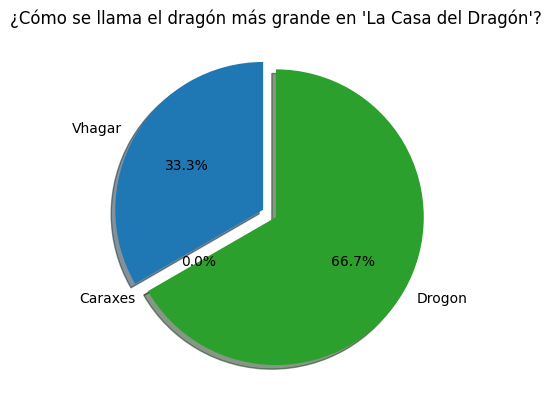

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import os

warnings.filterwarnings("ignore")
routeData = './data/AllData.json'
today_date = datetime.now().strftime("%d-%m-%Y")
statisticsRoute = './data/GameData.json'

with open(statisticsRoute, encoding='utf-8') as f:
    statisticData = json.load(f)
with open(routeData, encoding='utf-8') as f:
    fulldata = json.load(f)

arrayPreguntesAmbEstadistiques = []
for index in range(len(statisticData["dadesPerPregunta"])):
    auxObject = {}
    for pregunta in fulldata["preguntes"]:
        if pregunta['id'] == statisticData["dadesPerPregunta"][index]['id']:
            auxObject['pregunta'] = pregunta['pregunta']
            auxObject['correcta'] = pregunta["resposta_correcta"]
            auxObject['respostes'] = []
            auxObject['Intentada'] = statisticData["dadesPerPregunta"][index]['intents']
            for resposta in pregunta['respostes']:
                for respostaEstadistica in statisticData["dadesPerPregunta"][index]['respostes']:
                    if resposta == respostaEstadistica['text']:
                        auxObject['respostes'].append({"text": resposta, "escollida": respostaEstadistica['escollida']})
            break
    arrayPreguntesAmbEstadistiques.append(auxObject)

print("Escull de quina pregunta vols veure les estadístiques:")
for index in range(len(arrayPreguntesAmbEstadistiques)):
    print(str(index + 1) + ". " + arrayPreguntesAmbEstadistiques[index]['pregunta'])

option = -1
while option < 0 or option > len(arrayPreguntesAmbEstadistiques) - 1:
    try:
        option = int(input("Introduce el número de la pregunta: ")) - 1
        if option < 0 or option > len(arrayPreguntesAmbEstadistiques) - 1:
            print("Escull una pregunta vàlida")
    except ValueError:
        print("Por favor, introduce un número válido")

pregunta = arrayPreguntesAmbEstadistiques[option]

labels = [resposta['text'] for resposta in pregunta['respostes']]
sizes = [resposta['escollida'] for resposta in pregunta['respostes']]
correct_answer = pregunta['correcta']

# Generar la lista explode dinámicamente
explode = [0.1 if i == correct_answer else 0 for i in range(len(sizes))]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

plt.title(f"{pregunta['pregunta']}")
plt.show()